# Custom Neural Network

This is an evaluation of the custom fully dense neural network model I made from scratch in this project.

We will be testing how my model performs on two popular datasets:

- California Housing DataSet (https://www.kaggle.com/datasets/camnugent/california-housing-prices)
- MNIST Digit Recognization DataSet (https://www.kaggle.com/competitions/digit-recognizer/data)

My custom model was developed using the NumPy library and my own mathematical knowledge.

## California Housing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
housing_data = pd.read_csv('Datasets\CaliforniaHousing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


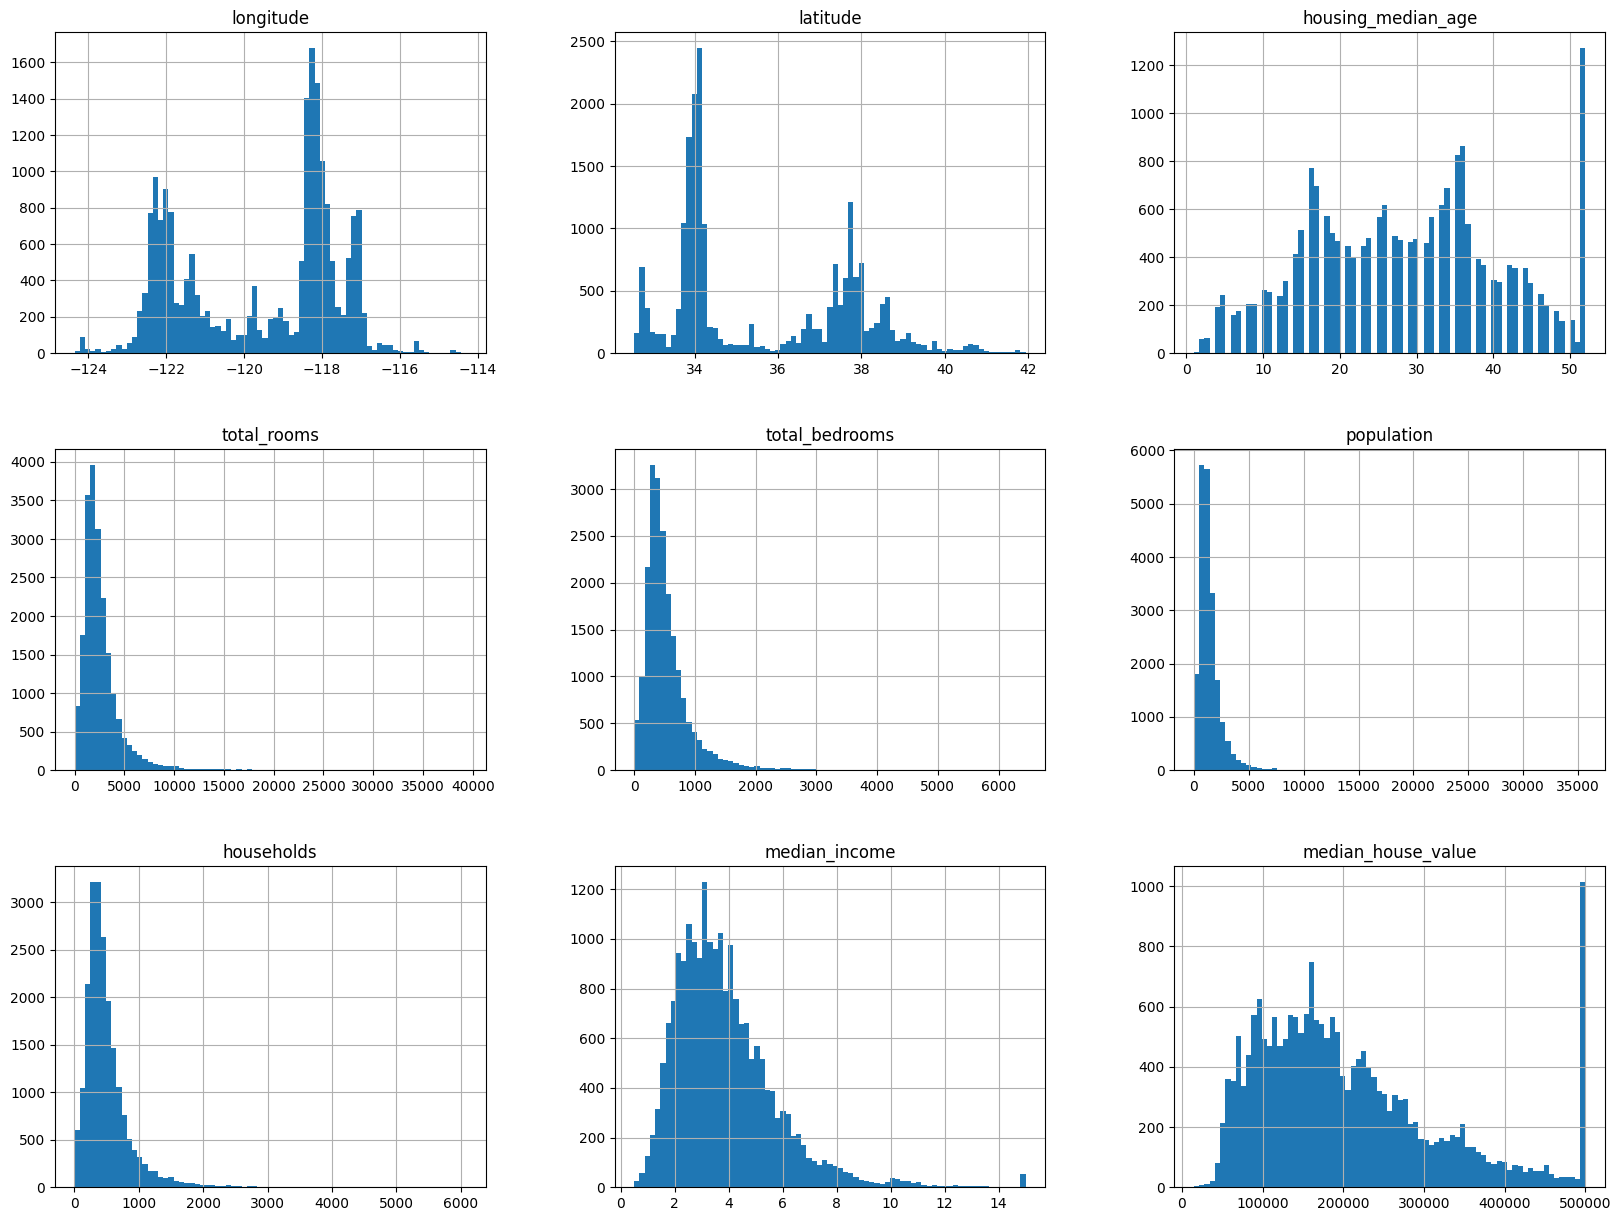

In [3]:
housing_data.hist(bins=75, figsize=(20,15))
plt.show()

### Cleaning the DataSet

First, we scramble the dataset so there will be no permuation bias.

In [5]:
housing_data = housing_data.sample(frac=1, random_state=12)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20498,-118.70,34.29,25.0,1678.0,252.0,862.0,268.0,6.1834,229800.0,<1H OCEAN
3472,-118.49,34.29,26.0,4516.0,611.0,1714.0,581.0,9.2873,431800.0,<1H OCEAN
15598,-116.35,32.74,16.0,2595.0,606.0,1046.0,367.0,1.7137,110700.0,INLAND
19685,-121.61,39.14,44.0,2035.0,476.0,1030.0,453.0,1.4661,65200.0,INLAND
3651,-118.44,34.21,41.0,1440.0,325.0,1014.0,322.0,2.8750,168600.0,<1H OCEAN


For this project, we will drop the data points with Nan values.

In [4]:
housing_data = housing_data.dropna()

Next, we will convert the text and categorical values into quantitative ones.

In [28]:
housing_data[["ocean_proximity"]].value_counts()

ocean_proximity
<1H OCEAN          9034
INLAND             6496
NEAR OCEAN         2628
NEAR BAY           2270
ISLAND                5
Name: count, dtype: int64

In [29]:
ocean_proximity_mapping = {'<1H OCEAN': 0, 'INLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4}
housing_data['ocean_proximity'] = housing_data['ocean_proximity'].map(ocean_proximity_mapping)
housing_data['ocean_proximity'].head()

6906     0
767      3
10555    0
17456    2
20617    1
Name: ocean_proximity, dtype: int64

### Creating Training and Test Sets

Now that we have cleaned our data, we can create the test and training sets:

(split_train_test function was borrowed from the O'Reily ML Textbook by Geron Aurelien)

In [8]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

We will use a training-test set ratio of 30:70.

In [9]:
train_set, test_set = split_train_test(housing_data, 0.3)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8062,-118.20,33.83,35.0,3737.0,613.0,1305.0,583.0,7.2096,490300.0,2
17481,-119.81,34.45,24.0,3678.0,567.0,1554.0,570.0,6.5173,334000.0,2
3808,-118.46,34.20,13.0,2926.0,816.0,1867.0,802.0,3.5255,202700.0,0
7010,-118.08,33.97,38.0,1026.0,190.0,789.0,193.0,4.2000,163200.0,0
11069,-117.86,33.84,19.0,1725.0,392.0,920.0,400.0,3.0087,159400.0,0


### Feature Scaling

In order for a neural network to perform the best, we must scale the training data down to the same scale. We will use the Sci-kit Learn Z-score normalization scaler for this.

In [30]:
from sklearn.preprocessing import StandardScaler

z_score_scaler = StandardScaler()

fitted_train_set = z_score_scaler.fit_transform(train_set)
train_X = pd.DataFrame(fitted_train_set, columns=train_set.columns).drop("median_house_value", axis=1).values
train_y = train_set["median_house_value"].values

scaled_test_set = z_score_scaler.transform(test_set)
test_X = pd.DataFrame(scaled_test_set, columns=test_set.columns).drop("median_house_value", axis=1).values
test_y = test_set["median_house_value"].values
train_X[:3]

array([[ 0.68470616, -0.84690002,  0.50926842,  0.50433376,  0.17448695,
        -0.10302888,  0.2129773 ,  1.78390557,  1.08245175],
       [-0.1184448 , -0.55622516, -0.36152413,  0.47737101,  0.06686426,
         0.11238411,  0.17958546,  1.41529521,  1.08245175],
       [ 0.55500476, -0.67343276, -1.23231667,  0.13371016,  0.64943055,
         0.3831643 ,  0.77550133, -0.17766807, -0.90476378]])

Combining the shuffling and scaling into a single function:

In [11]:
def shuffle_scale(data, ratio):
    train_set, test_set = split_train_test(data, ratio)
    z_score_scaler = StandardScaler()

    fitted_train_set = z_score_scaler.fit_transform(train_set)
    train_X = pd.DataFrame(fitted_train_set, columns=train_set.columns).drop("median_house_value", axis=1).values
    train_y = train_set["median_house_value"].values

    scaled_test_set = z_score_scaler.transform(test_set)
    test_X = pd.DataFrame(scaled_test_set, columns=test_set.columns).drop("median_house_value", axis=1).values
    test_y = test_set["median_house_value"].values
    
    return train_X, train_y, test_X, test_y

Now that we have our training and test sets, we can being training our model.

### Training Model

For our model, we will use a 4 layer deep fully connected neural network with a ReLu activation function for each hidden layer.

Creating a model using my custom package is similar to Tensorflow's method.

In [31]:
from Model import *

my_model = Model(Layers=[
    Dense_Layer(input_shape=9,output_shape=5, activation_func="relu"),
    Dense_Layer(input_shape=5,output_shape=5, activation_func="relu"),
    Output_Layer(input_shape=5,output_shape=1)
])

my_model.summary()

Dense Layer  | 5 neurons | 9 weights | 1 bias
Dense Layer  | 5 neurons | 5 weights | 1 bias
Output Layer | 1 outputs | 5 weights | 1 bias
Input Shape: 9
Output Shape: 1


In [7]:
long_test_err = []
long_train_err = []

for x in range(1):
    # train_X, train_y, test_X, test_y = shuffle_scale(housing_data, 0.3)
    train_err = my_model.fit(housing_data.drop("median_house_value", axis=1).values, housing_data["median_house_value"].values, epochs=1, learning_rate=0.001)
    test_err = []
    for i in range(len(test_X)):
        pred = my_model.forward_pass(test_X[i])
        test_err.append(abs(pred - test_y[i]))
    long_test_err += test_err
    long_train_err += train_err
plt.scatter(range(len(long_test_err)), long_test_err, s=1)
plt.xlabel("Iterations")
plt.ylabel("Absolute Error")
plt.title(f"{len(my_model.get_Layers())}-Layer Deep Neural Network Error")
plt.show()


NameError: name 'my_model' is not defined

In [14]:
my_model.get_Layers()[1].get_neurons()[0].get_weights()

array([nan, nan, nan, nan])

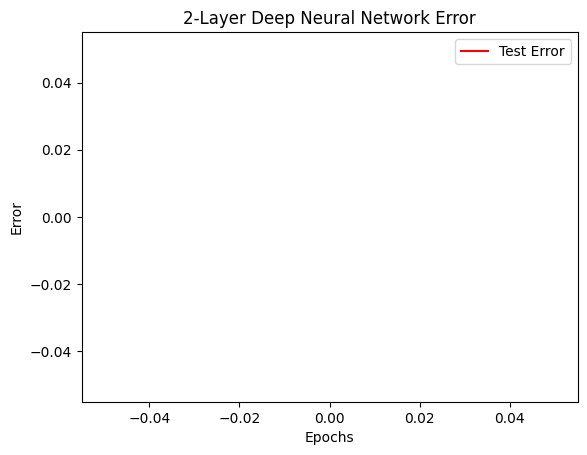

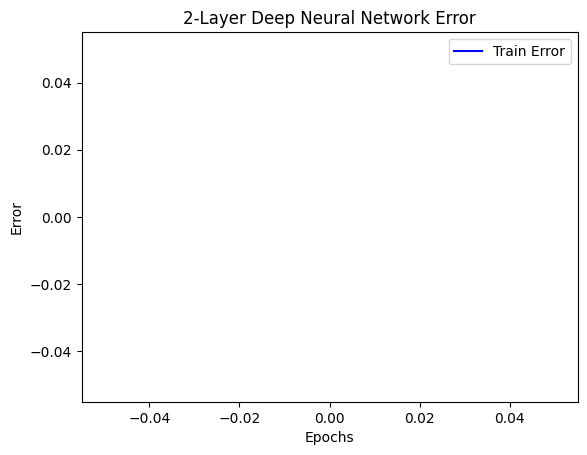

In [15]:
mv_train_err = np.convolve(long_train_err, np.ones(1000)/1000, mode='valid')


mv_test_err = np.convolve([x[0] for x in long_test_err], np.ones(1000)/1000, mode='valid')

plt.plot(mv_test_err, label="Test Error", color="red")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("{layers}-Layer Deep Neural Network Error".format(layers=len(my_model.get_Layers())))
plt.show()
plt.plot(mv_train_err, label="Train Error", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("{layers}-Layer Deep Neural Network Error".format(layers=len(my_model.get_Layers())))
plt.show()

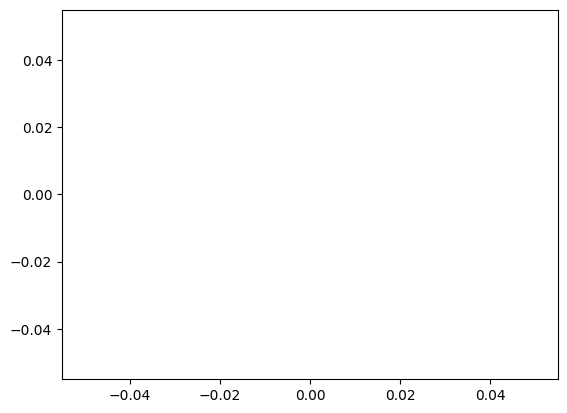

In [16]:
plt.scatter(test_y[:5000], [my_model.forward_pass(test_X[d]) for d in range(5000)], s=0.11)

## MNIST Digit Recognizer DataSet

Moving onto the MNIST Digit Recongizer DataSet, we will be classifying handwritten numbers into their corresponding digits.